In [ ]:
#pip3 install opencv-python
#!apt install ffmpeg libsm6 libxext6 libgl1-mesa-dev
!apt update
!apt install ffmpeg libsm6 libxext6 -y
!pip install opencv-python
!pip install --upgrade pip

Hit:1 http://security.debian.org/debian-security buster/updates InRelease
Hit:2 http://deb.debian.org/debian buster InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease



27 packages can be upgraded. Run 'apt list --upgradable' to see them.



ffmpeg is already the newest version (7:4.1.8-0+deb10u1).
libsm6 is already the newest version (2:1.2.3-1).
libxext6 is already the newest version (2:1.3.3-1+b2).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
^C
Traceback (most recent call last):
  File "/root/venv/bin/pip", line 5, in <module>
    from pip._internal.cli.main import main
  File "/root/venv/lib/python3.7/site-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/root/venv/lib/python3.7/site-packages/pip/_internal/cli/autocompletion.py", line 12, in <module>
    from pip._internal.metadata import get_default_environment
  File "/root/venv/lib/python3.7/site-packages/pip/_in

In [ ]:
import pandas as pd
import Config
import skimage as sk
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.pyplot import imread
import cv2



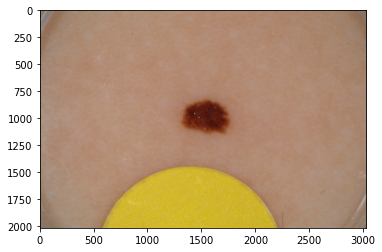

In [ ]:
#upload a picture 
path="../data/example_image/ISIC_0001852.jpg"
image = sk.io.imread(fname=path)
plt.imshow(image)

(2016, 3024, 3) (2016, 3024)
(array([ 810,  810,  810, ..., 1161, 1161, 1161]), array([1551, 1552, 1553, ..., 1584, 1585, 1597]))
(130493, 3)


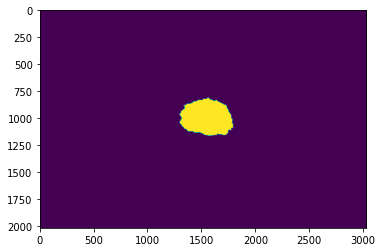

In [ ]:
#upload the segmentation of the same image
path_mask="../data/example_segmentation/ISIC_0001852_segmentation.png"
image_bw = sk.io.imread(fname=path_mask)
image_bw2 = image_bw
plt.imshow(image_bw)
#image_bw2 = np.expand_dims(image_bw2, axis=-1)

#plt.imshow(image_segmentation , cmap='gray')
white_values = np.where(image_bw2 == 255)
unique, counts = np.unique(image_bw, return_counts=True)
#image2 = np.

#print(white_values[0][0])
#print(unique, counts)
#plt.imshow(image_bw, cmap='gray')
#white_values
print(image.shape, image_bw2.shape)
print(white_values)
print(image[white_values].shape)

#print(image_bw[image_bw[0] == white_values[0] & image_bw[1] == white_values[1]])
#plt.imshow(image[white_values])

<BarContainer object of 16 artists>

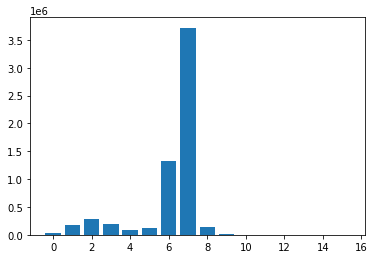

In [ ]:
#unique, counts = np.unique(image)
#p#lt.hist(unique, counts)

feature_index = 2
feat_vec, bin_edges = np.histogram(image[:,:,feature_index], bins=16)

plt.bar(np.arange(0,16), feat_vec)


In [ ]:
not_alpha = image_bw2 == 255
alpha = not_alpha ^ 0
#print(np.unique(alpha, return_counts=True))

image_copy = image.copy()
np.append(image_copy, alpha)
print(image_copy.shape)
print(image[0][0])

(2016, 3024, 3)
[137 125 109]


In [ ]:
image[0][0]

array([137, 125, 109], dtype=uint8)

In [ ]:
test = np.array([[[3],[2]],[4],[5]])
print(test)
print(test.shape)

[list([[3], [2]]) list([4]) list([5])]
(3,)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
#print(image_segmentation)
#print(image)
#select the lession 
tmp_arr = image_bw * image[:,:]

#count the colors in the lession 
#print an histogram 

ValueError: operands could not be broadcast together with shapes (2016,3024) (2016,3024,3) 

[[[137 125 109]
  [137 125 109]
  [140 126 113]
  ...
  [136 113  95]
  [136 110  93]
  [136 110  93]]

 [[136 124 108]
  [137 125 109]
  [139 125 112]
  ...
  [134 111  93]
  [136 110  93]
  [136 110  93]]

 [[138 125 109]
  [138 125 109]
  [136 123 107]
  ...
  [136 110  93]
  [136 110  93]
  [136 110  93]]

 ...

 [[138 111  90]
  [137 110  89]
  [138 111  92]
  ...
  [141 118 102]
  [140 117 103]
  [141 118 104]]

 [[137 112  92]
  [137 112  92]
  [138 111  94]
  ...
  [142 119 103]
  [140 117 101]
  [140 117 101]]

 [[138 113  93]
  [137 112  92]
  [139 112  95]
  ...
  [142 119 103]
  [141 118 102]
  [140 117 101]]]


In [ ]:
# create a circular mask to select the 7th well in the first row
#mask = np.array([[image_bw,image_bw]])
mask= np.concatenate((image_bw, image_bw), axis = -1)
print(mask.shape)
#masked_img = image[:]
masked_img[np.logical_not(mask)] = 0

"""
# just for display:
# make a copy of the image, call it masked_image, and
# use np.logical_not() and indexing to apply the mask to it
masked_img = image[:]
masked_img[np.logical_not(mask)] = 0

# create a new figure and display masked_img, to verify the
# validity of your mask
fig, ax = plt.subplots()
plt.imshow(masked_img)
plt.show()

# list to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for (channel_id, c) in zip(channel_ids, colors):
    # use your circular mask to apply the histogram
    # operation to the 7th well of the first row
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id][mask], bins=256, range=(0, 256)
    )

    plt.plot(histogram, color=c)

plt.xlabel("color value")
plt.ylabel("pixel count")

plt.show()
"""

(2016, 6048)


NameError: name 'masked_img' is not defined

In [ ]:
print(image_bw)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
arr= np.array([1, 2, 3,4,5], ndmin=3)

print(arr)
print(arr.shape)

[[[1 2 3 4 5]]]
(1, 1, 5)


In [ ]:
np.append(arr, np.array(6, ndmin=3), axis=2)
arr.shape

(1, 1, 5)

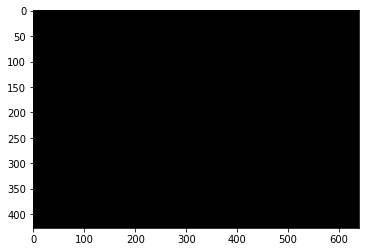

In [ ]:
from sklearn.datasets import load_sample_images
from matplotlib.pyplot import imread


dataset = load_sample_images()     
temple = image[:]
plt.imshow(temple)

heart = imread(path, cv2.IMREAD_GRAYSCALE)
#heart= plt.imshow(image_bw,cmap='gray')
_, mask = cv2.threshold(heart, thresh=180, maxval=255, type=cv2.THRESH_BINARY)


temple_x, temple_y, _ = temple.shape
heart_x, heart_y = mask.shape

x_heart = min(temple_x, heart_x)
x_half_heart = mask.shape[0]//2

heart_mask = mask[x_half_heart-x_heart//2 : x_half_heart+x_heart//2+1, :temple_y]
plt.imshow(heart_mask, cmap='Greys_r')

#temple_width_half = temple.shape[1]//2
#temple_to_mask = temple[:,temple_width_half-x_half_heart:temple_width_half+x_half_heart]
#masked = cv2.bitwise_and(temple_to_mask,temple_to_mask,mask = heart_mask)
#plt.imshow(masked)



In [ ]:
import cv2
import matplotlib.pyplot as plt

heart = imread(path_mask, cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(heart, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
            



error: OpenCV(4.5.5) /io/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


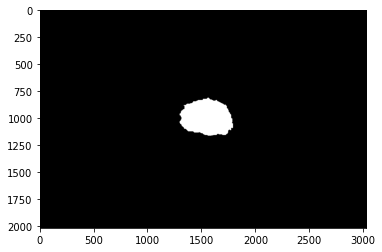

In [ ]:

temple_x, temple_y, _ = temple.shape
heart_x, heart_y = mask.shape

x_heart = min(temple_x, heart_x)
x_half_heart = mask.shape[0]//2

#heart_mask = mask[x_half_heart-x_heart//2 : x_half_heart+x_heart//2+1, :temple_y]
heart_mask=image_bw2
plt.imshow(heart_mask,cmap='gray')
temple_width_half = temple.shape[1]//2



temple_to_mask = temple[:,temple_width_half-x_half_heart:temple_width_half+x_half_heart]
masked = cv2.bitwise_and(temple_to_mask,temple_to_mask,mask = heart_mask)
plt.imshow(masked)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=932aa97b-f6d2-4889-8f04-d6166675cc2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>